In [7]:
%load_ext autoreload
%autoreload 2
import HammingCode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import NeuralNetworkCorrection as network
import Autoencoder
import Utils

2024-05-26 08:06:22.359633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 08:06:22.359949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 08:06:22.362673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-26 08:06:22.386706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 08:06:24.085603: W tensorflow/compiler/tf2

In [8]:
# tamanho da amostra
tamanho = 1e8
variancia = 1

# amostra
tamanho_amostra = 10**3
Eb_dB_values = np.arange(-2, 11, 1)

# ML data

# Gerar dados de treinamento
word_length = 4 # Tamanho padrão da entrada do hamming
training_sample_length = 10 **3
epoches = 200
training_noisy_data = []
training_original_data = []
batch_size = 16

training_data = {
    'original': [],
    'noisy': [],
    'info': []
}
training_information = network.get_training_data_set(training_sample_length)

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(training_information, eb_db, variancia)
    training_data['info'].append(info)
    training_data['noisy'].extend(info['split_encoded_data'])
    training_data['original'].extend(info['split_original_data'])

training_data['original'] = np.array(training_data['original'])
training_data['noisy'] = np.array(training_data['noisy'])


In [9]:
# Criar e treinar a rede neural
model = network.train_neural_network(training_data, epoches, batch_size)
autoencoder = Autoencoder.create_and_train_auto_encoder(training_data, epoches, batch_size)

Epoch 1/200
204/204 [==============================] - 2s 6ms/step - loss: 0.6381 - accuracy: 0.4498 - val_loss: 0.5657 - val_accuracy: 0.7105
Epoch 2/200
204/204 [==============================] - 1s 5ms/step - loss: 0.4896 - accuracy: 0.7234 - val_loss: 0.4093 - val_accuracy: 0.6194
Epoch 3/200
204/204 [==============================] - 1s 5ms/step - loss: 0.3424 - accuracy: 0.5677 - val_loss: 0.2855 - val_accuracy: 0.4923
Epoch 4/200
204/204 [==============================] - 1s 5ms/step - loss: 0.2562 - accuracy: 0.4655 - val_loss: 0.2327 - val_accuracy: 0.4849
Epoch 5/200
204/204 [==============================] - 1s 5ms/step - loss: 0.2205 - accuracy: 0.4615 - val_loss: 0.2109 - val_accuracy: 0.5326
Epoch 6/200
204/204 [==============================] - 1s 5ms/step - loss: 0.2059 - accuracy: 0.4763 - val_loss: 0.2004 - val_accuracy: 0.4323
Epoch 7/200
204/204 [==============================] - 1s 5ms/step - loss: 0.1981 - accuracy: 0.4382 - val_loss: 0.1946 - val_accuracy: 0.5200

In [10]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
ML_result = []
tradicional_result = []
autoencoder_result = []


In [11]:
test_data = {
    'original': [],
    'info': []
}
test_sample_length = 10 ** 3
test_information = network.get_training_data_set(test_sample_length)

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(test_information, eb_db, variancia)
    test_data['info'].append(info)
    test_data['original'] = info['original_data']
    print(eb_db)

-2
-1
0
1
2
3
4
5
6
7
8
9
10


In [12]:
i = 0
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))

1/1 [==============================] - 0s 26ms/step


In [13]:
i = 1
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 26ms/step


In [14]:
i = 2
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 27ms/step


In [15]:
i = 3
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 26ms/step


In [16]:
i = 4
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 27ms/step


In [17]:
i = 5
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 28ms/step


In [18]:
i = 6
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 27ms/step


In [19]:
i = 7
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 35ms/step


In [20]:
i = 8
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 27ms/step


In [21]:
i = 9
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 28ms/step


In [22]:
i = 10
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 29ms/step


In [23]:
i = 11
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 28ms/step


In [24]:
i = 12
autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


1/1 [==============================] - 0s 36ms/step


In [25]:
iteration = 0
for i in test_data['info']:
    tradicional_result.append(HammingCode.decode_sample(i['split_encoded_data']))
    iteration+=1
    print(iteration)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [26]:
BER_tradicional = []
BER_autoencoder = []
BER_ML = []
for i in range(0, len(Eb_dB_values)):
    BER_ML.append(np.sum(np.array(ML_result[i]).astype(int) != test_data['original']) / len(test_data['original']))
    BER_tradicional.append(np.sum(np.array(tradicional_result[i]).astype(int) != test_data['original']) / len(test_data['original']))
    BER_autoencoder.append(np.sum(np.array(autoencoder_result[i]).astype(int) != test_data['original']) / len(test_data['original']))

print(BER_tradicional)
# Calcular a BER teórica
Eb_values = 10**(Eb_dB_values / 10)
BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

[0.1, 0.058, 0.028, 0.023, 0.008, 0.012, 0.006, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0]


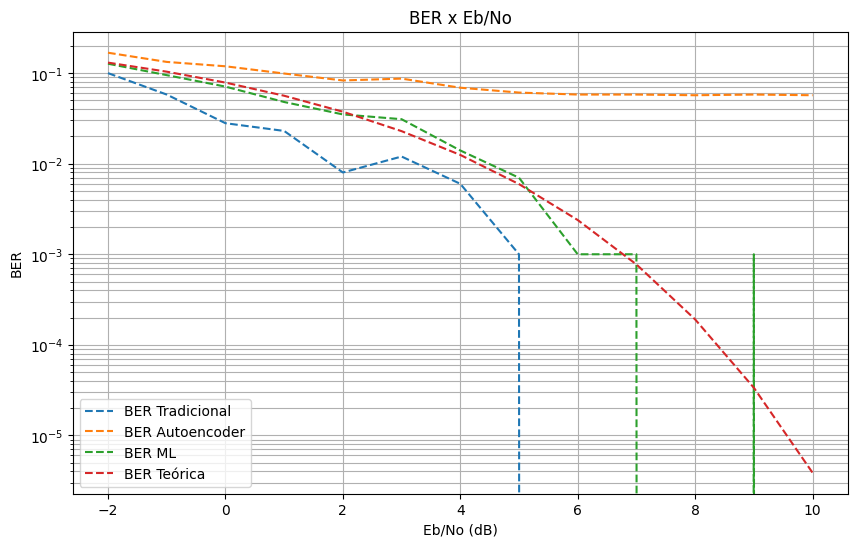

In [27]:
# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_dB_values, BER_tradicional, linestyle = '--', label='BER Tradicional')
plt.semilogy(Eb_dB_values, BER_autoencoder, linestyle = '--', label='BER Autoencoder')
plt.semilogy(Eb_dB_values, BER_ML, linestyle = '--', label='BER ML')
plt.semilogy(Eb_dB_values, BER_teorica, linestyle='--', label='BER Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER x Eb/No')
plt.show()